In [84]:
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt
from datetime import timedelta
import seaborn as sns
import pandas as pd
import numpy as np


df = pd.read_csv("C:/Users/ricar/Desktop/encoded_db.csv")

## Limpieza Base de Datos Orignial

In [ ]:
df.info()

In [65]:
df.drop(columns = ['Indefinido total $', 'Indefinido ctdad','Unnamed: 0','index'], inplace = True)

In [66]:
def borra_espacio(str):
    str = str[5:16]
    return str

In [67]:
df['date'] = df['date'].apply(borra_espacio)

In [68]:
#df.to_csv("WorkingDB2.csv" , index=False)
df2 = pd.read_csv('C:/Users/ricar/Desktop/GitHub/colchoncitos/WorkingDB2.csv')

## Segundo CSV

In [69]:
df2.iloc[0,0]

'02-01-22'

In [70]:
df2['date'] = pd.to_datetime(df2.date, format = '%d-%m-%y')

In [71]:
producto1 = df2[df2['Encoded Products'] == 'Producto 1']
fecha_inicio = producto1.iloc[0,0]
fecha_fin = producto1.iloc[-1,0]
fecha_inicio

Timestamp('2022-01-02 00:00:00')

In [75]:
def add_days(df_prod, df_gen, fecha_inicio, fecha_fin, producto):
    fecha = fecha_inicio
    while fecha != fecha_fin:
        if(len(df_prod[df_prod['date'] == fecha]) == 0):
            entrada = pd.Series([fecha, producto,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0], index = df_gen.columns)
            df_gen = pd.concat([df_gen,entrada.to_frame().T], ignore_index = True)
        fecha = fecha + timedelta(days = 1)
    return df_gen

In [77]:
df_copy_gen = df2.copy()
df_copy_prod = producto1.copy()
df3 = add_days(df_copy_prod, df_copy_gen, fecha_inicio, fecha_fin, 'Producto 1')
df3_proucto1 = df3[df3['Encoded Products'] =='Producto 1'].sort_values('date')

In [ ]:
df3_proucto1.info()

In [86]:
df2.head()

,date,Encoded Products,Cadereyta total $,Cadereyta ctdad,Coahuila total $,Coahuila ctdad,Durango total $,Durango ctdad,Expos F total $,Expos F ctdad,...,Online total $,Online ctdad,Queretaro total $,Queretaro ctdad,Reynosa total $,Reynosa ctdad,San Luis total $,San Luis ctdad,Total libre de impuestos,Ctdad Ordenada
0,2022-01-02,Producto 11,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.00,0.0,0.0,0.0,18162.13,3.5,58623.600,10.5
1,2022-01-02,Producto 6,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,23477.44,3.5,0.0,0.0,0.00,0.0,23477.440,3.5
2,2022-01-02,Producto 24,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.00,0.0,0.0,0.0,0.00,0.0,31083.500,3.5
3,2022-01-02,Producto 15,0.0,0.0,0.000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.00,0.0,0.0,0.0,0.00,0.0,42846.020,7.0
4,2022-01-02,Producto 9,0.0,0.0,27154.855,3.5,0.0,0.0,0.0,0.0,...,0.0,0.0,0.00,0.0,0.0,0.0,0.00,0.0,27154.855,3.5


## SARIMA

<Axes: xlabel='date', ylabel='Ctdad Ordenada'>

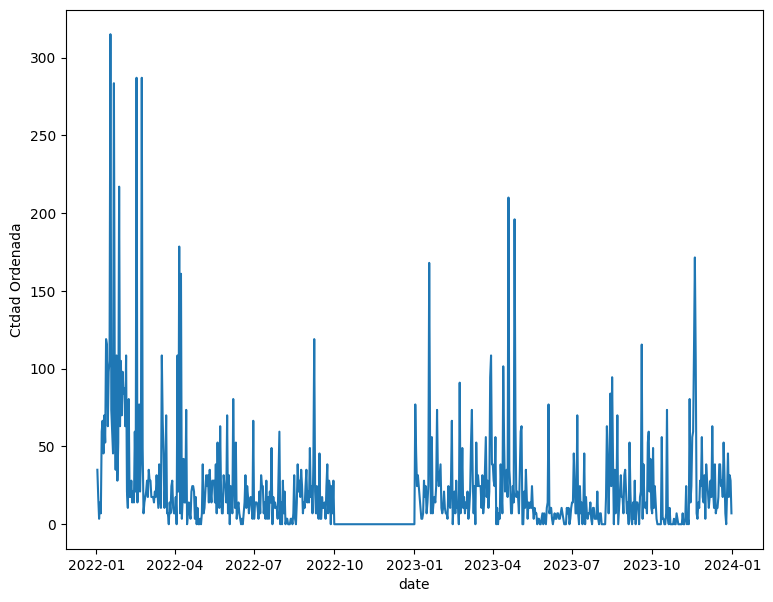

In [87]:
plt.figure(figsize=(9,7))
sns.lineplot(x='date',y='Ctdad Ordenada',data=df3_proucto1)

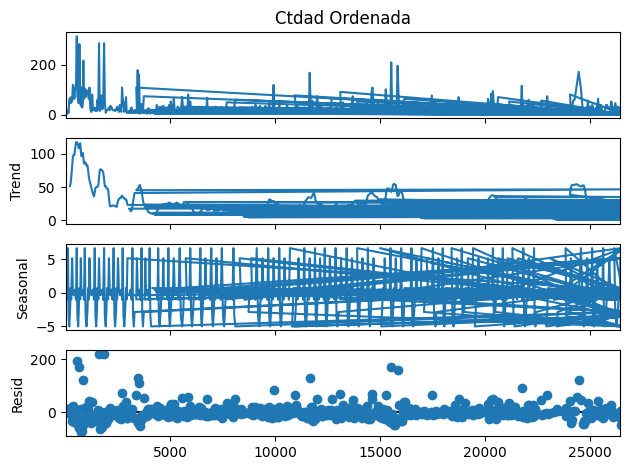

In [85]:
decomposition=seasonal_decompose(df3_proucto1['Ctdad Ordenada'],model='additive',period=12)
decomposition.plot()
plt.show()